In [1]:
# Install the Kaggle module
%pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105812 sha256=7d43ad4cb377d6deb44082e0deb1b25c09d2eca332b5a19c256003331c308b6c
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\9f\af\22\bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
# Download the dataset from Kaggle and save it directly into the PrepareModel folder
!kaggle datasets download -d omkargurav/face-mask-dataset -p PrepareModel

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:03<00:00, 59.0MB/s]
100% 163M/163M [00:03<00:00, 54.3MB/s]


In [4]:
# Unzip the downloaded file in the PrepareModel folder
!unzip PrepareModel/face-mask-dataset.zip -d PrepareModel

In [5]:
# Remove the zip file after unzipping
!rm PrepareModel/face-mask-dataset.zip

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense
import seaborn as sns
from tensorflow.keras.models import save_model
from tensorflow.math import confusion_matrix

In [2]:
directory = '/kaggle/input/face-mask-dataset/data'
categories = ['with_mask','without_mask']

In [3]:
# Load data and resize it with size 100 by 100
Image_size = 100
data = []
for category in categories:
    label = categories.index(category)
    folder = os.path.join(directory,category)
    for img_name in os.listdir(folder):
        image_path = os.path.join(folder,img_name)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image,(Image_size,Image_size))
            data.append([resized_image,label])

In [4]:
# Find two indices, one for masked image and one for not
twoindices = []
has = False
nothave = False
index = 0
for feature, label in data:
    if has == False and label == 0:
        twoindices.append(index)
        has = True
    elif nothave == False and label == 1:
        twoindices.append(index)
        nothave = True
    if has == True and nothave == True:
        break
    index += 1

masked


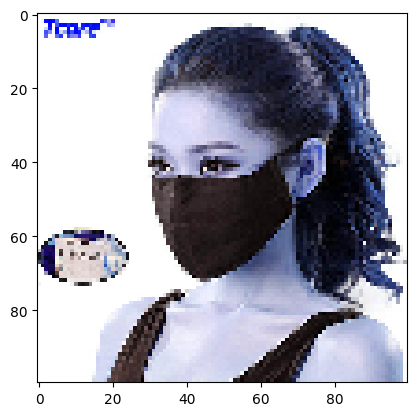

not masked


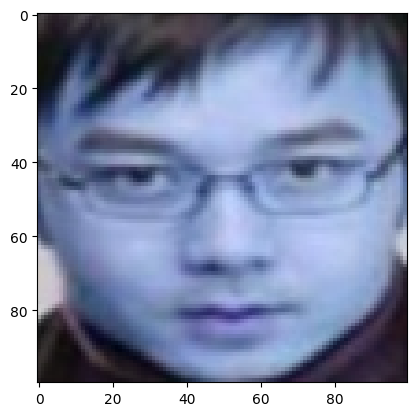

In [5]:
# Show tow images, one with mask and another without
for index in twoindices:
    print('not masked' if data[index][1] == 1 else 'masked')
    plt.imshow(data[index][0])
    plt.show()

In [6]:
# Shuffle data 
random.shuffle(data)

In [7]:
# Split data into input and label data
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

In [8]:
print(f'X:{len(X)}, Y:{len(Y)}')

X:7553, Y:7553


In [9]:
# Convert data into numpy array
Y = np.array(Y)
X = np.array(X)
# Show the input and label data size
print(X.shape)
print(Y.shape)

(7553, 100, 100, 3)
(7553,)


In [10]:
# Scaling images values
X = X/255

masked


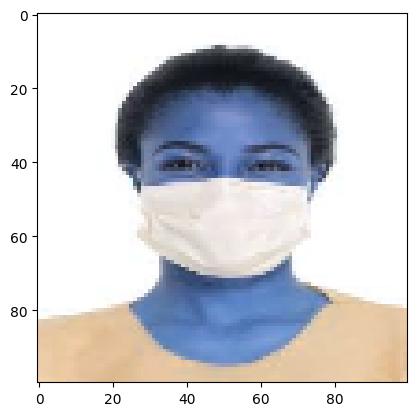

not masked


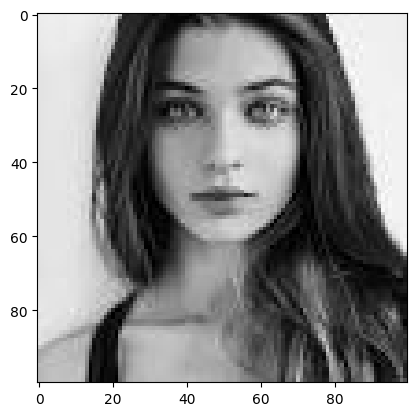

not masked


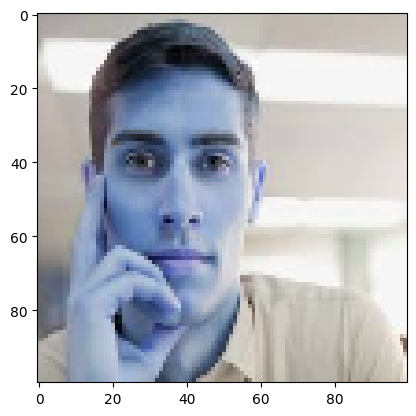

not masked


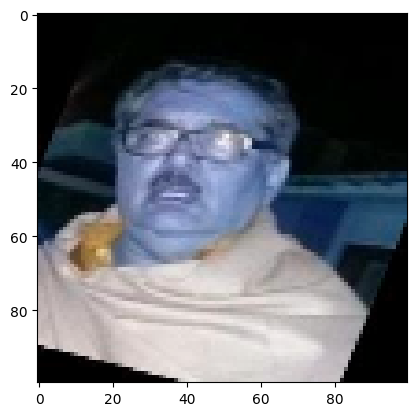

not masked


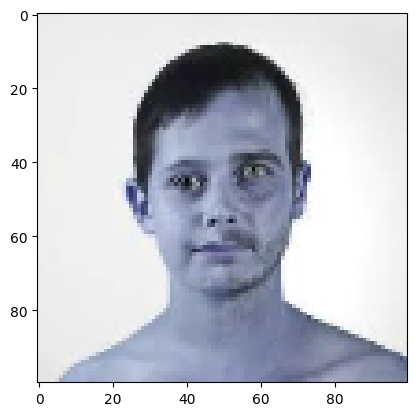

In [11]:
# Show the first five images and its labels
for i in range(5):
    print('masked' if Y[i] == 0 else 'not masked')
    plt.imshow(X[i])
    plt.show()

In [12]:
# Split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.95,random_state=2)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(7553, 100, 100, 3) (7175, 100, 100, 3) (378, 100, 100, 3)
(7553,) (7175,) (378,)


In [13]:
# Create the model

# Determine the input size
Input_size = (Image_size,Image_size,3)
# Determine the number of classes
Num_classes = 2

Model = Sequential([
    Input(shape=Input_size),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(Num_classes,activation='softmax')
])

In [14]:
# Compile the model
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# train the model
result = Model.fit(x_train,y_train,validation_split=0.1,epochs=7)

Epoch 1/7
202/202 [==============================] - 53s 255ms/step - loss: 0.3930 - accuracy: 0.8279 - val_loss: 0.3012 - val_accuracy: 0.8774
Epoch 2/7
202/202 [==============================] - 50s 250ms/step - loss: 0.2215 - accuracy: 0.9130 - val_loss: 0.2436 - val_accuracy: 0.9011
Epoch 3/7
202/202 [==============================] - 51s 253ms/step - loss: 0.1558 - accuracy: 0.9399 - val_loss: 0.2333 - val_accuracy: 0.9136
Epoch 4/7
202/202 [==============================] - 51s 251ms/step - loss: 0.1047 - accuracy: 0.9608 - val_loss: 0.2309 - val_accuracy: 0.9136
Epoch 5/7
202/202 [==============================] - 51s 252ms/step - loss: 0.0691 - accuracy: 0.9741 - val_loss: 0.2261 - val_accuracy: 0.9262
Epoch 6/7
202/202 [==============================] - 51s 252ms/step - loss: 0.0519 - accuracy: 0.9822 - val_loss: 0.2302 - val_accuracy: 0.9359
Epoch 7/7
202/202 [==============================] - 51s 250ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.2866 - val_accuracy:

In [16]:
# evaluate the model
evaluation = Model.evaluate(x_test,y_test)
print("the loss value is: ",evaluation[0])
print("the accuracy value is: ",evaluation[1])

12/12 [==============================] - 1s 60ms/step - loss: 0.2470 - accuracy: 0.9153
the loss value is:  0.24699825048446655
the accuracy value is:  0.9153439402580261


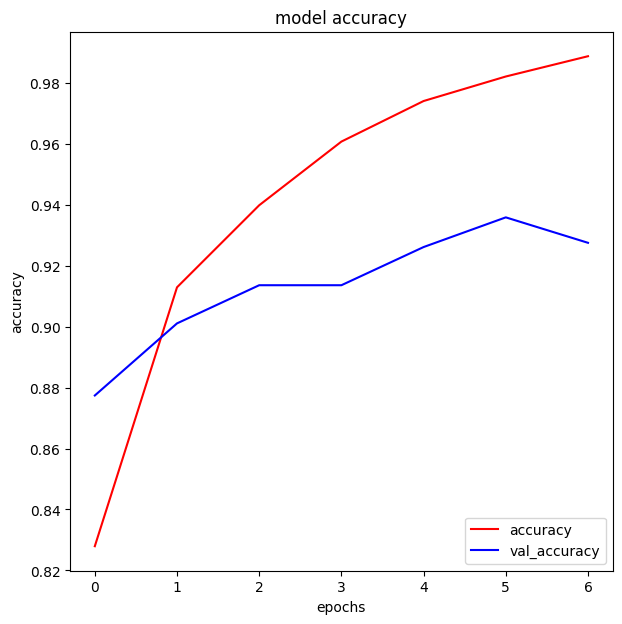

In [17]:
# Visualize the accuracy with the validation accuracy
plt.figure(figsize=(7,7))
plt.plot(result.history['accuracy'],color='red')
plt.plot(result.history['val_accuracy'],color='blue')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')

In [18]:
# Make the model predict on test input data
predicted_y = Model.predict(x_test)

12/12 [==============================] - 1s 63ms/step


In [19]:
y_predicted_values = []
for value in predicted_y:
    y_predicted_values.append(np.argmax(value))
comparison = []
for predicted_value,true_value in zip(y_predicted_values,y_test):
    comparison.append([predicted_value,true_value])
print(comparison)

[[1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 0], [0, 0], [1, 0], [0, 0], [1, 1], [1, 1], [0, 1], [1, 0], [0, 0], [0, 1], [0, 0], [0, 1], [1, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 1], [0, 1], [0, 0], [0, 0], [1, 1], [0, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1],

In [20]:
print(len(comparison))

378


<Axes: >

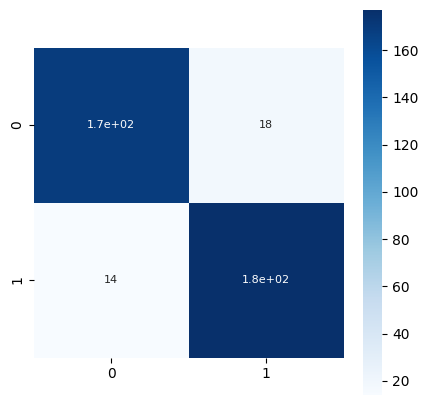

In [21]:
plt.figure(figsize=(5,5))
conf_matrix = confusion_matrix(y_test,y_predicted_values)
sns.heatmap(conf_matrix,square=True,cbar=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [22]:
# Make a predictive system 
def detect_mask(image_path):
    image = cv2.imread(image_path)
    # Ensure the image has 3 color channels (e.g., convert from grayscale to RGB)
    if image.shape[-1] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    # Resize the image
    resized_image = cv2.resize(image,(Image_size,Image_size))
    # Normalize the image by scaling it
    resized_image = resized_image / 255

    # Make the model predict what is in the image if it's dog will print 1 otherwise will print 0
    prediction = Model.predict(np.expand_dims(resized_image, axis=0))
    print(prediction)
    predicted_class = ['Masked','Not Masked'][np.argmax(prediction)]
    print(predicted_class)

In [23]:
detect_mask('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3326.jpg')
detect_mask('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2302.jpg')

1/1 [==============================] - 0s 23ms/step
[[9.9976724e-01 2.3279403e-04]]
Masked
1/1 [==============================] - 0s 23ms/step
[[0.00720109 0.9927989 ]]
Not Masked


## Save Model

In [24]:
# Define the path to save the model
model_path = 'preparingmodel\Model.h5'

# Check if the model file already exists
if not os.path.exists(model_path):
    # Save the model
    save_model(Model, model_path)
    print(f"Model has been saved to '{model_path}'")

Model has been saved to 'preparingmodel\Model.h5'
